<a href="https://colab.research.google.com/github/SamaSamrin/Basic-Image-Augementation/blob/main/Basic_Image_Augmentation_Clean_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf
from tensorflow.keras import datasets
from tensorflow.keras.utils import load_img, img_to_array

import cv2
from google.colab.patches import cv2_imshow

from PIL.Image import Image, open

# Preparing for downloading Kaggle Dataset

In [ ]:
!pip install kaggle

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"samasamrin","key":"1da83af3e4301702ae5a5d8e0adfc45c"}'}

In [ ]:
!mkdir -p ~/.kaggle

In [ ]:
!cp kaggle.json ~/.kaggle/

In [ ]:
!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets list

ref                                                                   title                                                size  lastUpdated          downloadCount  voteCount  usabilityRating  
--------------------------------------------------------------------  --------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
arnabchaki/data-science-salaries-2023                                 Data Science Salaries 2023 💸                         25KB  2023-04-13 09:55:16          35334        970  1.0              
tawfikelmetwally/automobile-dataset                                   Car information dataset                               6KB  2023-05-28 18:26:48           5050        140  0.9411765        
fatihb/coffee-quality-data-cqi                                        Coffee Quality Data (CQI May-2023)                   22KB  2023-05-12 13:06:39           6994        147  1.0              
mohithsairamreddy/salary-data 

Bringing Kaggle datasets to Colab without manual download: https://buggyprogrammer.com/load-kaggle-dataset-in-colab-or-jupyter/

# Brighter Dataset from Kaggle to understand the transformations better

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
!pwd

/content


In [19]:
%cd /content/drive/MyDrive/data-aug/simpler

/content/drive/MyDrive/data-aug/simpler


### Downloading dataset from Kaggle and unzipping the files

In [ ]:
!kaggle datasets download -d alessiocorrado99/animals10 -p /content/drive/MyDrive/data-aug/simpler/

 99% 582M/586M [00:05<00:00, 104MB/s]
100% 586M/586M [00:05<00:00, 105MB/s]


In [ ]:
from zipfile import ZipFile
file_name = 'animals10.zip' #the file is your dataset exact name
with ZipFile(file_name, 'r') as zip:
  zip.extractall()
print('Done')

Done


In [ ]:
!pwd

/content/drive/MyDrive/data-aug/simpler


In [6]:
from tensorflow.keras.utils import load_img, img_to_array

img = load_img('raw-img/gatto/1.jpeg')
img = img_to_array(img)

In [7]:
img.shape

(210, 300, 3)

In [8]:
img = img.reshape((1,) + img.shape)

In [9]:
img.shape

(1, 210, 300, 3)

## Generating transformed images

In [ ]:
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rotation_range = 5, shear_range = 0.5,
                             zoom_range = 0.5, samplewise_center=True,samplewise_std_normalization= True)

In [ ]:
# the .flow() command below generates batches of randomly transformed images and saves the results to the `preview/` directory
i = 0
for batch in datagen.flow(img, batch_size = 1, save_to_dir ='previews',save_prefix ='cats', save_format ='jpeg'):
    i += 1
    if i > 5:
        break

In [20]:
!pwd

/content/drive/MyDrive/data-aug/simpler


In [21]:
%cd /content/drive/MyDrive/data-aug/simpler/previews/

/content/drive/MyDrive/data-aug/simpler/previews


In [22]:
import glob
images = glob.glob('*.jpeg')

In [16]:
print(images)

['cats_0_4410.jpeg', 'cats_0_1786.jpeg', 'cats_0_1395.jpeg', 'cats_0_8588.jpeg', 'cats_0_859.jpeg', 'cats_0_2451.jpeg', 'cats_0_7150.jpeg']


i = 0  rows = 3  columns = 3
i = 1  rows = 3  columns = 3
i = 2  rows = 3  columns = 3
i = 3  rows = 3  columns = 3
i = 4  rows = 3  columns = 3
i = 5  rows = 3  columns = 3
i = 6  rows = 3  columns = 3


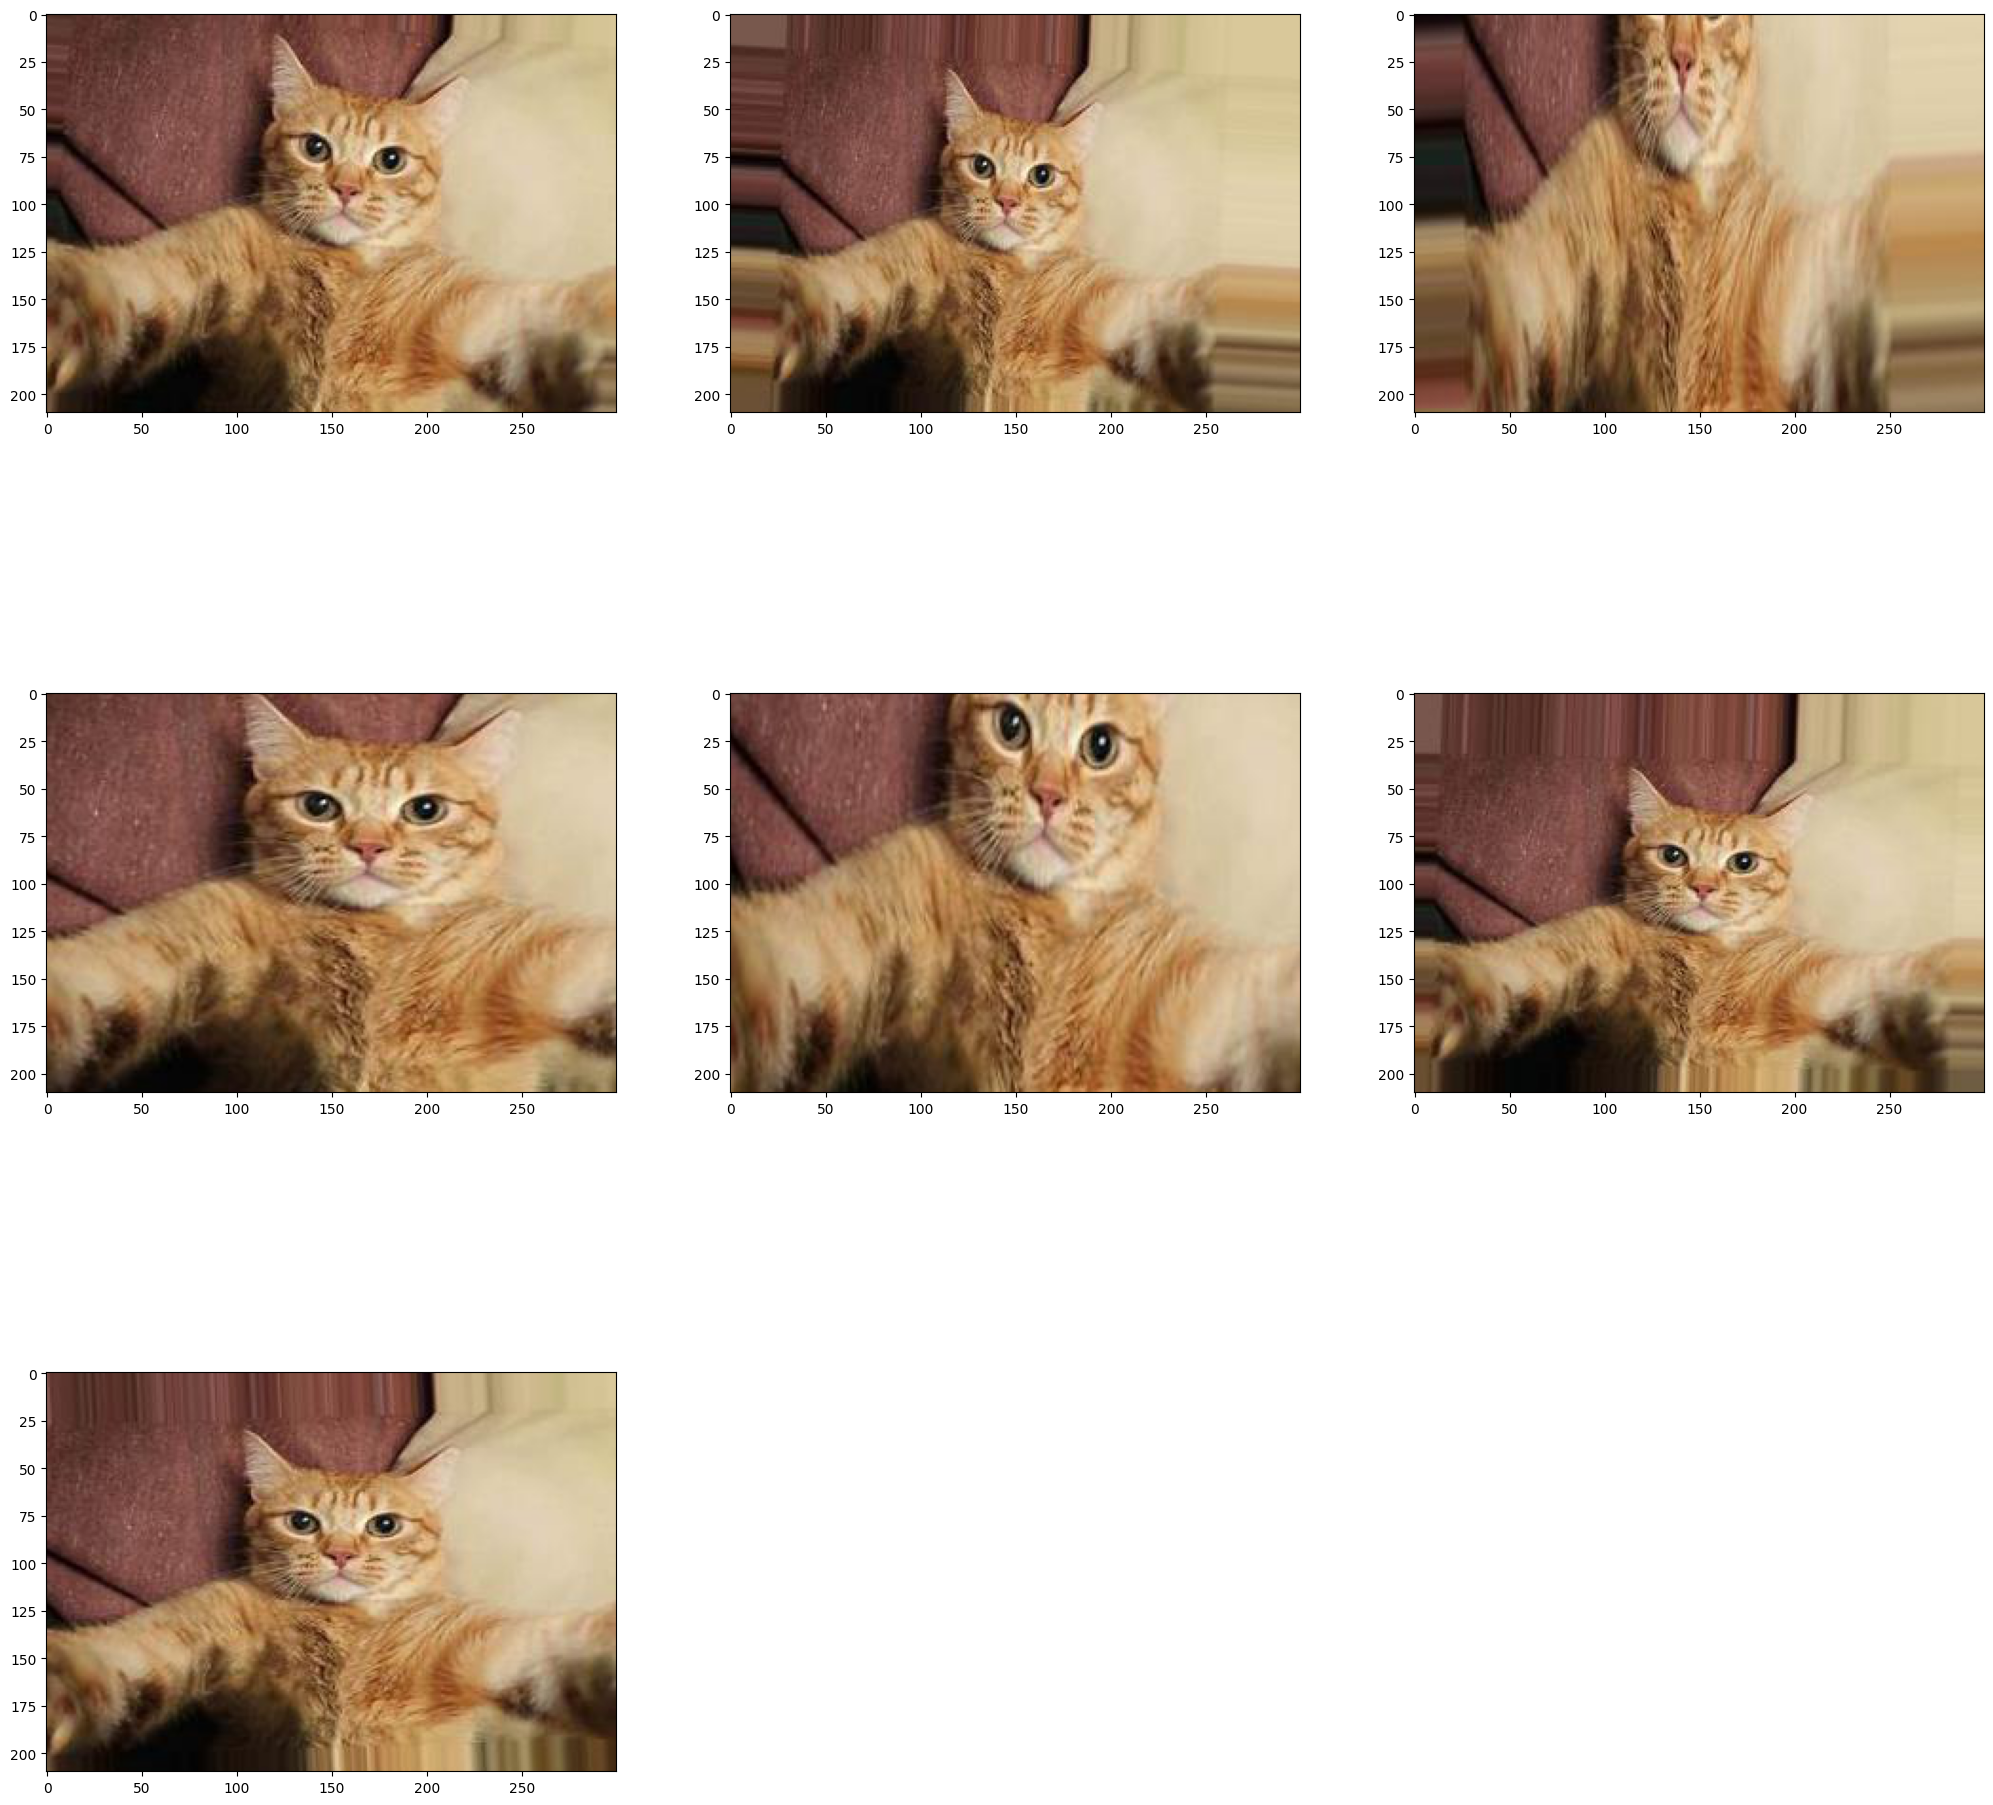

In [24]:
plt.figure(figsize=(25,25))

number_of_rows = int(len(images)/3) + 1
if number_of_rows<=0:
  number_of_rows = 1
number_of_columns = 3

for i in range(len(images)):
  print("i =", i, " rows =", number_of_rows, " columns =", number_of_columns)
  plt.subplot(number_of_rows, number_of_columns, i+1)
  img = np.asarray(open(images[i]))
  #print(img)
  #imgplot = plt.imshow(img)
  plt.imshow(img)

# Extras

**Why convert image into arrays?**

Converting an image to an array is an important task to train a machine learning model based on the features of an image. This allows maximum inter-operability with other libraries in the scientific Python ecosystem, such as matplotlib and scipy .

**What is PIL?**

PIL = Python Imaging Library, adds image processing capabilities to your Python interpreter.

**Why we reshape images?**

To match the expected input shape of a neural network

**What is a sandbox?**

A sandbox is an **isolated testing environment** that enables users to run programs or open files without affecting the application, system or platform on which they run. Software developers use sandboxes to test new programming code. Cybersecurity professionals use sandboxes to test potentially malicious software.

# Useful Resources

https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/